# <span style='color:red'> Representig Data and Feature Engineering</span>
- Data can be categorical or continuous (Analogus to classification or regression)
- ex: Continuous feature - pixel brightness, measurement of size, Categorical - Product types, brand of products
- There is no natural order for categorical calsses, man is same as women in data categorization, book is no greater or less than clothing
- How is feature represented matters a lot to the ML performance - This is where data scaling comes in to the picture
- If we don't rescale the data then (say to unit variance) then it matters whether we represent data in CM or INCHES
- WIth rescaling it would be easier to augment data with additional features , like addining interactions (products) or more general polynomials  
** Feature Engineering ** - <span style='color:red'>How to represent data best for a particular application </span>
## <span style='color:brown'>Categorical Variables</span>
- One-Hot-Encoding or one-out-of-N encoding or dummy variables: add all categorical values in the features and assign value 0 or 1 depeneding upon what feature that corresponding data point has one of these values
- Dummy variable - 
- Lets read one ADULT data CSV file


In [773]:
import pandas as pd
import numpy as np
import mglearn1
import matplotlib.pyplot as plt

In [774]:
data=pd.read_csv('E:/Niraj/Niraj Personal/Learnings/Machine Learning/Data/adult.data',header=None,index_col=False,
            names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
                  'race','gender','capital-gain','capital-loss','hours-per-week','native-country','income'])

In [775]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [776]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [777]:
# We select few columns for illustration purpose
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]

In [778]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


## <span style='color:blue'>Check colums values using PANDAS value_counts() function</span>

In [779]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [780]:
data.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

## <span style='color:red'>Encode data in pandas using __get_dummies__ </span>

In [781]:
print('Original features:\n{}'.format(list(data.columns)))

Original features:
['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']


In [782]:
list(data.columns)

['age',
 'workclass',
 'education',
 'gender',
 'hours-per-week',
 'occupation',
 'income']

In [783]:
data_dummies=pd.get_dummies(data)
print('Features after get_dummies :\n',list(data_dummies))

Features after get_dummies :
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupati

In [784]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [785]:
X=data_dummies.ix[:,'age':'occupation_ Transport-moving']
y=data_dummies.ix[:,'income_ >50K']

C:\Users\Niraj Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [786]:
pd.DataFrame(X).head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [787]:
pd.DataFrame(y).head()

,income_ >50K
0,0
1,0
2,0
3,0
4,0


In [788]:
y.shape

(32561,)

In [789]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [790]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [791]:
logrec=LogisticRegression()

In [792]:
logrec.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [793]:
print('Test Score : {:.2f}'.format(logrec.score(X_test,y_test)))

Test Score : 0.81


# <span style='color:green'>Numbers can Encode Categoricals</span>
- Columns having numericals may look to maintain continuous values but there are semantically discrete. e.g. Values 01 = work type 1, 02 = work type 2 and so on.
- Either use SCIKIT-LEARN's OneHotEncoder, for which we can specify which variables are CONTINUOUS vs DISCRETE
- Or Convert the data types as STRING and Pandas can create dummy variables

In [794]:
demo_df=pd.DataFrame({'Integer Feature':[0,1,2,3],'Categorical Feature':['socks','fox','socks','box']})

In [795]:
demo_df

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,3


In [796]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0


In [797]:
# We can convert the Numerical column to Non Numerical
demo_df['Integer Feature']=demo_df['Integer Feature'].astype(str)

In [798]:
pd.get_dummies(demo_df,columns=['Categorical Feature','Integer Feature'])

,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks,Integer Feature_0,Integer Feature_1,Integer Feature_2,Integer Feature_3
0,0,0,1,1,0,0,0
1,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1


# <span style='color:red'>Binning, Discretization, Linear Models & Trees</span>

In [799]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [800]:
X,y = mglearn1.datasets.make_wave(n_samples=100)

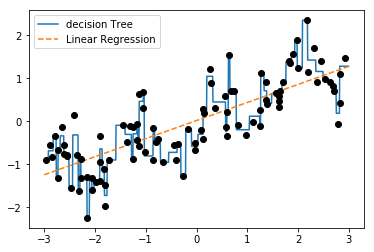

In [801]:
%matplotlib inline
reg=DecisionTreeRegressor(min_samples_split=3).fit(X,y)
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
plt.plot(line,reg.predict(line),label='decision Tree')
reg=LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),'--',label='Linear Regression')
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')

- __Partition the input range into fixed bins__
- __A datapoint will fall into a particular bin __
- __Illustration to make 10 bins out of -3 to +3 __

In [802]:
bins=np.linspace(-3,3,11)
print('bins : {}'.format(bins))

bins : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


- __Record each data point which bin it falls into __

In [803]:
which_bin = np.digitize(X,bins)

In [804]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [805]:
print(which_bin[:5])
which_bin.shape

[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


(100, 1)

- __We transformed each datapoint from the wave dataset to one of the 10 bins __
- We can use scikit learn to transform this feature to __OneHotEncoder__

In [806]:
from sklearn.preprocessing import OneHotEncoder

In [807]:
encoder = OneHotEncoder(sparse=False)

In [808]:
encoder.fit(which_bin)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [809]:
X_binned=encoder.transform(which_bin)

In [810]:
X_binned.shape

(100, 10)

In [811]:
print(X_binned[:5])
y[:5]

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


array([-0.39794858,  0.71057755,  0.41392867, -0.34838379, -1.60200406])

In [812]:
which_bin[:5]

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]], dtype=int64)

In [813]:
line_binned=encoder.transform(np.digitize(line,bins))

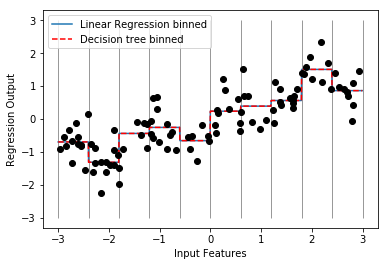

In [816]:
# Now train the model - Supervised model
reg=LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='Linear Regression binned')
reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),'--',label='Decision tree binned',c='r')
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linewidth=1,alpha=0.4)
plt.ylabel('Regression Output')
plt.xlabel('Input Features')
plt.legend(loc='best')

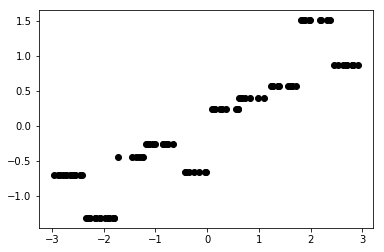

In [182]:
_=plt.plot(X,reg.predict(X_binned),'o',c='k')

<span style='color:blue'>__Notes:__</span>
- Comparing Linear Regression with Decision Tree
- With the introduction of bins LINEAR MODEL incraeses the flexibilities where as DECISION TREE decreases in Flexibility
- Linear model took the shape of somewhat sine wave but in rectangular which is improvement over the straight line fit 
- Decision Tree looses the flexibilities
- both curve in the picture is coinciding
- ** Binning is very useful when there is a good reason to use LINEAR REGRESSION (May be dataset is having tons of features and very large)and there is certain non-linearity in the input->output function **

# <span style='color:blue'>Interactions and Polynomials</span>
- Improve feature representation in linear modle is to add __(a) interaction features and (b) Polynomial Features__
- LInear model can have offset and slope, so we can add slop in the earlier bin model.Bin model has constant value in a bin and we can improvise that by addining slopes, for that we can add original data
- That will be 10+1 features

In [43]:
X_combined = np.hstack([X_binned,X])
X_combined.shape

(100, 11)

In [44]:
reg= LinearRegression().fit(X_combined,y)

In [45]:
line_combined=np.hstack([line_binned,line])

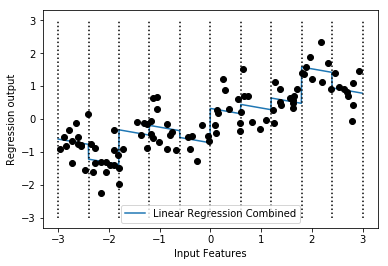

In [46]:
plt.plot(line,reg.predict(line_combined),label='Linear Regression Combined')
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.ylabel('Regression output')
plt.xlabel('Input Features')
plt.legend(loc='best')
plt.plot(X[:,0],y,'o',c='k')

- The model learned offset and slop
- The learned slop is downward and shared across all the bins
- Since the slop is shared across all bins so doesn't seem to be helpful  
 __Can we have slop for each bin__
- We can achieve this by adding an interaction or PRODUCT feature ==>which bin data point is and where it lies on x axis __(This FEATURE = product of bin indicator and original feature)__

In [231]:
X_product= np.hstack([X_binned,X*X_binned])
X_product.shape

(100, 20)

In [232]:
X_product[0]

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.75275929, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

In [233]:
X_product.shape

(100, 20)

In [234]:
reg=LinearRegression().fit(X_product,y)

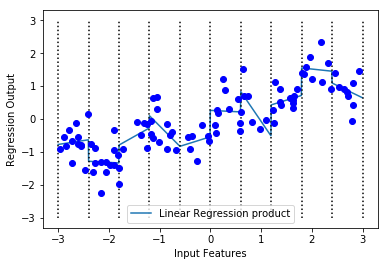

In [236]:
plt.plot(line,reg.predict(np.hstack([line_binned,line*line_binned])),label='Linear Regression product')
# Wanted to test without stacking up with bin index
# plt.plot(line,reg.predict(line*line_binned),label='Linear Regression product')
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.plot(X[:,0],y,'o',c='b')
plt.ylabel('Regression Output')
plt.xlabel('Input Features')
plt.legend(loc='best')

- __We use both bins and interaction within the bin __  
** Lets use Polynomial feature within bin **


In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
## Lets us include ply features = 10 , meaning x**1,x**@,...x**10 etc. as the feature of x
## inlude_bias = True will add new feature with 1
poly=PolynomialFeatures(degree=10,include_bias=False)

In [53]:
poly.fit(X)

PolynomialFeatures(degree=10, include_bias=False, interaction_only=False)

In [54]:
X_poly=poly.transform(X)
X_poly.shape

(100, 10)

In [55]:
# Compare 
print('X  :{}\n, X_poly  :{}'.format(X[:1],X_poly[:1]))

X  :[[-0.75275929]]
, X_poly  :[[-0.75275929  0.56664654 -0.42654845  0.32108831 -0.2417022   0.18194358
  -0.13695972  0.1030977  -0.07760775  0.05841996]]


In [56]:
print('Feature Names {}'.format(poly.get_feature_names()))

Feature Names ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


In [57]:
reg=LinearRegression().fit(X_poly,y)

In [58]:
line_poly=poly.transform(line)
line_poly.shape

(1000, 10)

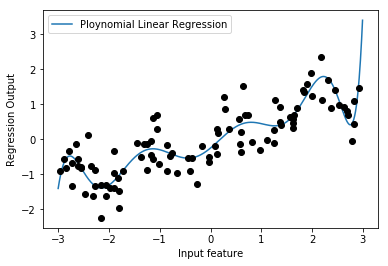

In [59]:
plt.plot(line,reg.predict(line_poly),label='Ploynomial Linear Regression')
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('Regression Output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [60]:
from sklearn.svm import SVR

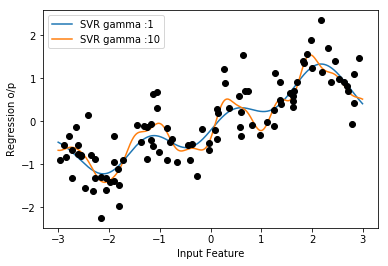

In [241]:
for gamma in [1,10]:
    svr=SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='SVR gamma :{}'.format(gamma))
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('Regression o/p')
plt.xlabel('Input Feature')
plt.legend(loc='best')

In [242]:
# Load Boston dataset
# Normalize using MinMaxScaler 
# Train data using Linear Regression using RIDGE having NORMAL and Polynomial function 
# Test both the results and compare
# Use RandomForest and compare the results 

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [243]:
boston=load_boston()
boston.data.shape

(506, 13)

In [244]:
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state =0)

In [247]:
scaler = MinMaxScaler().fit(X_train)

In [252]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [67]:
# transform Xs using polynomial
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

In [68]:
X_train_poly = poly.transform(X_train_scaled)

In [69]:
X_train_poly.shape

(379, 105)

In [70]:
X_test_poly = poly.transform(X_test_scaled)

In [71]:
print('All features in the ploynomial transformed data set :{}'.format(poly.get_feature_names()))

All features in the ploynomial transformed data set :['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [72]:
# Performance check using RIDGE with and without Polynomial
ridge= Ridge().fit(X_train_scaled,y_train)
print('Performance without interaction :{:.2f}'.format(ridge.score(X_test_scaled,y_test)))

Performance without interaction :0.62


In [73]:
ridge=Ridge().fit(X_train_poly,y_train)

In [74]:
print('Performance with Interaction {:.2f}'.format(ridge.score(X_test_poly,y_test)))

Performance with Interaction 0.75


## Conclusion : Slight increase in the performance using INTERACTION
### <span style='color:red'> Test using slightly more complex model like RANDOM FOREST </span>

In [75]:
randfor = RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print('Performance using Random forest {:.2f}'.format(randfor.score(X_test_scaled,y_test)))
randfor=RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print('Performance using Random Forest with Interaction {:.2f}'.format(randfor.score(X_test_poly,y_test)))

Performance using Random forest 0.80
Performance using Random Forest with Interaction 0.78


## <span style='color:brown'>Conclusion:-</span>
- Random forest is teh complex model and can very well learn complex dataset 
- RF with interaction gives slightly poor result as compared to with INTERACTION ??
- Without additional features RF can beat RIDGE performance

# <span style='color:red'>Univariate Nonlinear Transformations:-</span>
- Tree based models only care about ordering of feature
- Linear model & NN are tied to the scale & distribution of each feature, If there is NON Linear rel between Feature & Target ==> becomes dificult to model (Particularly in REGRESSION)
- Log ad Exp helps in adjusting relative scales
- sin and cos function can be used in dealing with periodic data
- MODEL Works best if each feature is GAUSSIAN DISTRIBUTED (In Regression also the TARGET)
- log, exp are used to achieve this
- ** We use SYNTHETIC dataset of counts that has similar properties of WILD dataset **


In [256]:
rnd= np.random.RandomState(0)

In [257]:
X_org=rnd.normal(size=(1000,3))
w=rnd.normal(size=3)

In [258]:
X=rnd.poisson(10*np.exp(X_org))
y=np.dot(X_org,w)

In [259]:
bins=np.bincount(X[:,0])

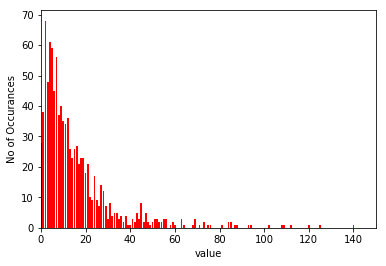

In [260]:
plt.bar(range(len(bins)),bins,color='r')
plt.xlim([0,150])
plt.ylabel('No of Occurances')
plt.xlabel('value')

- ** Above graph reflects upon any small values 1,0s but very few large values, Most linear model can't handle this well **
- Lets try to fit RIDGE REGRESSION Model

In [81]:
from sklearn.linear_model import Ridge

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [83]:
ridge=Ridge().fit(X_train,y_train)

In [84]:
score = ridge.score(X_test,y_test)
print('Score :{:.3f}'.format(ridge.score(X_test,y_test)))

Score :0.612


In [85]:
# Now run data points using log
X_train_log=np.log(X_train+1)
X_test_log=np.log(X_test+1)

In [86]:
ridge=Ridge().fit(X_train_log,y_train)

In [87]:
print('Score :{:.3f}'.format(ridge.score(X_test_log,y_test)))

Score :0.881


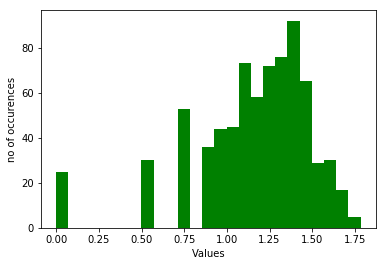

In [88]:
plt.hist(np.log(X_train_log[:,0]+1),bins=25,color='g')
plt.ylabel('no of occurences')
plt.xlabel('Values')

## <span style='color:red'>Log has improved the fit to 88.1% </span>

# Conclusion:-
- Binnining, Polynomials and Interactions can have huge influence on how model performs on a given dataset
- Complex Model e.g TREE are often able to discover interaction on their own
- SVMs, NN, nearest neighbours might be benefited but the implications are much less clear as compared to LINEAR Model

# <span style='color:brown'>Automatic Feature Selection :-</span>
- How to find important features or what are teh good features
- We can drop unneccessary features to keep model simple
- __ Three basic sstrategies (a) Univariate statistics (b) Model based selection and (c) iterative selection __
- <span style='color:red'>All of these methods are SUERVISED METHODS ==> Need target to fit the model ==> Training & Testing data set </span>


# Univariate statistics :-
- Determine what features are statistically significant (Features with high confidence are selected)
- In classification this is also known as ANOVA (Analysis of Variance) - Features with high confidence
- UNIVARIATE - Consider each feature individually , discard the feature if the feature if ONLY informative with the combination of other features
- In scikit-learn we need to choose a test (a) f_classif (default for classification) (b) f_regression for Regression
- Features with high p Value are dropped 
- Method to drop featues/parameters vary , Method determines the threshold in dropping the features , simplest being __SelectKBest__ and __SelectPercentile__
- ** Apply feature selection for the classification of CANCER Dataset **

In [89]:
# We will add some noisesklearn.datasets
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile

In [90]:
cancer = load_breast_cancer()

In [91]:
rng= np.random.RandomState(42)

In [265]:
noise = rng.normal(size=(len(cancer.data),50))

In [274]:
X_w_noise = np.hstack([cancer.data,noise])

In [275]:
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=0.5)

In [276]:
# We can use f_classif and SelectPercentile to select 50% of the features
select= SelectPercentile(percentile=50)

In [277]:
select.fit(X_train,y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x00000268333E8048>)

In [279]:
X_train_transform=select.transform(X_train)

In [280]:
print('X_train shape:{}'.format(X_train.shape))
print('X_train_selected shape :{}'.format(X_train_transform.shape))

X_train shape:(284, 80)
X_train_selected shape :(284, 40)


# <span style='color:red'>Lets check out which features have been selected </span>

In [281]:
mask=select.get_support()

In [282]:
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False False False False  True False False False  True
 False False  True  True False False False False  True False False False
  True  True  True False False  True  True False  True False False False
 False False False  True False False False False]


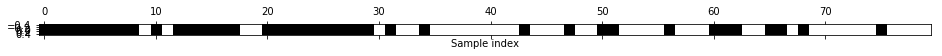

In [283]:
# Visualize mask - black is TRUE and white is FALSE
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Sample index')


In [284]:
mask.reshape(1,-1).shape

(1, 80)

In [285]:
# Lets compare logistic regression between all features (80) and reduced set (40)
from sklearn.linear_model import LogisticRegression

In [286]:
X_test_transformed = select.transform(X_test)

In [287]:
X_test_transformed.shape

(285, 40)

In [288]:
lr=LogisticRegression().fit(X_train,y_train)

In [289]:
print('Score with all features :{:.3f}'.format(lr.score(X_test,y_test)))

Score with all features :0.919


In [290]:
lr=LogisticRegression().fit(X_train_transform,y_train)

In [291]:
print('Score with reduced features :{:.3f}'.format(lr.score(X_test_transformed,y_test)))

Score with reduced features :0.940


__ Note: Removing noise features actually improves the performance__

# <span style='color:blue'> Model-based feature selection</span>
- This method uses SUPERVISED LEARNING MODEL to judge the importance of each FEATURE and keeps only the MOST Important ones
- Supervised model that is used for FEATURE selection doesn't have to be the same model for final SUPERVISED MODELING
- Feature Selection model needs to provide some measure of importance for each feature 
- Decision Tree ==> has an attributes as ** feature_importances **
- Difference between UNIVARIATE and Model based FS is , Model based selection considers all feature at once unlike UNIVARIATE so can capture interaction
- Use __SelectFromModel__ transformer

In [292]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [272]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold='median')

In [293]:
select.fit(X_train,y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x00000268333E8048>)

In [294]:
X_train_l1=select.transform(X_train)

In [295]:
X_train.shape

(284, 80)

In [296]:
X_train_l1.shape

(284, 40)

In [297]:
mask=select.get_support()

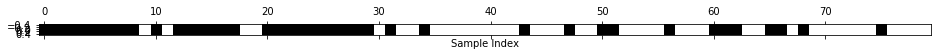

In [298]:
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Sample Index')

In [302]:
# Now test the PERFORMANCE
X_train_l1=select.transform(X_train)
X_test_l1=select.transform(X_test)
lr=LogisticRegression().fit(X_train_l1,y_train)

In [303]:
print('Performance score :{:.3f}'.format(lr.score(X_test_l1,y_test)))

Performance score :0.940


# <span style='color:blue'>Conclusion :- Performance is better than UNIVARIATE </span>

# <span style='color:red'>Iterative feature Selection</span>
- Univariate - Use no model but statistics (p Value) to determine significant features
- Model Based - use single Model to get important features
- Iterative feature selection - Series of models are built with varying number of Features  
** two basic methods **
- 1. Start with no feature and add each feature until there is some stopping criteria
- 2. Start with all features and drop one by one untill some stopping criteria
- __RFE__ = Method is Recurssive Feature Elimination, starts with all features, builds a model , discard least important 

In [309]:
from sklearn.feature_selection import RFE

In [332]:
select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=40)

In [333]:
select.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

In [334]:
X_train_rfe=select.transform(X_train)

In [335]:
X_train_rfe.shape
X_train.shape

(284, 80)

In [336]:
mask=select.get_support()

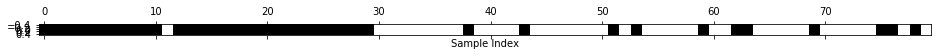

In [337]:
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
_=plt.xlabel('Sample Index')

In [338]:
X_test_rfe=select.transform(X_test)

In [339]:
score=LogisticRegression().fit(X_train_rfe,y_train).score(X_test_rfe,y_test)

In [340]:
print('Score {:.3f}'.format(score))

Score 0.933


In [341]:
# Or we can fit using the same selecting model
select.score(X_test,y_test)

0.94385964912280707

# Utilizing Expert knowledge
- Domian knowledge help adding value in the learning the model
- Citi bike data analysis 
- We will use the dates (Gregorion) as the only feature (POSIX format uses dates as seconds from 1970 Jan 01 00:00:00)
- Predict as how many appx. bikes will be left so that a person can plan
- Lets try using Tree (Randon Forest Classifier) as model to make prediction

In [342]:
citibike=mglearn1.datasets.load_citibike()

In [347]:
citibike.shape

(248,)

In [349]:
citibike.head(10)

starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
2015-08-01 15:00:00    27.0
2015-08-01 18:00:00    12.0
2015-08-01 21:00:00     4.0
2015-08-02 00:00:00     3.0
2015-08-02 03:00:00     4.0
Freq: 3H, Name: one, dtype: float64

- #1 X = dates as feature
- #2 y = Rental numbers
- #3 Regressor = RandonForestTree
- #4 Split X into Trainig and testing data set (184 datapoints and rest to testing)
- #5 Traini model using 184 data points

In [589]:
# y converts time into the nano seconds
X = citibike.index.astype('int').values.reshape(-1,1)
y = citibike.values
X_ticks = citibike.index
#X_ticks.strftime('%a %m-%d')
range(0,len(X_ticks),8)

range(0, 248, 8)

In [613]:
# Function to train and test the model
def eval_on_features(features,target,regressor):
    X_train, y_train = features[:n_train],target[:n_train]
    X_test,y_test=features[n_train:],target[n_train:]
    regressor.fit(X_train,y_train)
    print('Test Score R^2: {:.2f}'.format(regressor.score(X_test,y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train=regressor.predict(X_train)
    
    plt.figure(figsize=(15,5))
    plt.xticks(range(0,len(X_ticks),8),X_ticks.strftime('%a %m-%d')[::8],rotation = 90,ha='right')
    plt.plot(range(n_train),y_train,label='train')
    
    plt.plot(range(n_train,len(X_test)+n_train,),y_test,'-',label='test')
    plt.plot(range(n_train),y_pred_train,'--',c='k',label='prediction train',alpha=0.8)
    plt.plot(range(n_train,len(X_test)+n_train),y_pred,'--',c='r',label='prediction test')
    
    plt.legend(loc=(1.01,0))
    plt.xlabel('Date')
    plt.ylabel('Rentals')
    

Test Score R^2: -0.04


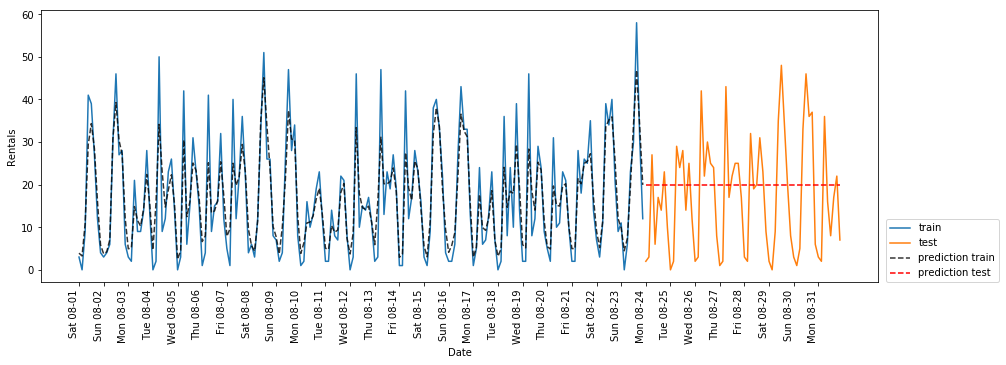

In [614]:
regressor= RandomForestRegressor(n_estimators=100,random_state=0)
eval_on_features(X,y,regressor)

# Conclusion: The above model couldn't learn to project peoper value beyond the range it was trained.
- Why ? - Because in the tree (in this Random Forest Algorithmn) can't forecast anything beyond the range it was trained.
- SO Training prediction has been good
# <span style='color:red'> How to fix this : Use domain expertise</span>
- Instead of date , can we use time and days (These two factors look very important)

In [622]:
X_hour= citibike.index.hour.values.reshape(-1,1)

Test Score R^2: 0.60


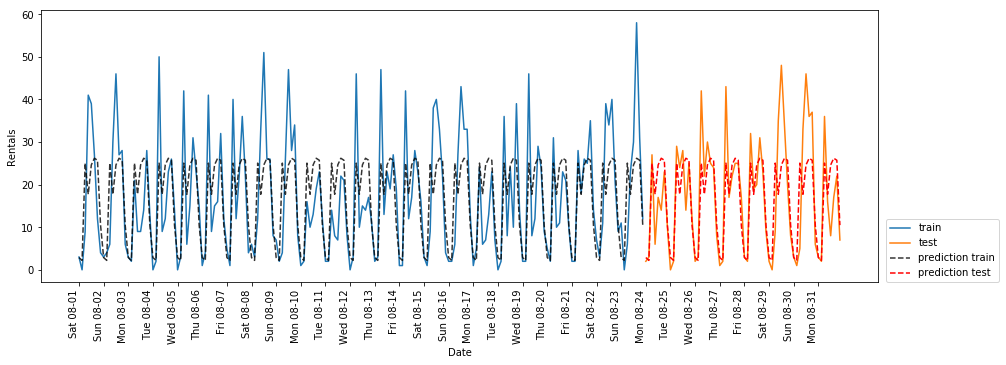

In [623]:
eval_on_features(X_hour,y,regressor)

# Conclusion: R${^2}$ is much better = 0.60 but we are loosing the weekly pattern. We can improve by adding day of the week

In [626]:
X_hour_week =np.hstack([citibike.index.dayofweek.values.reshape(-1,1),citibike.index.hour.values.reshape(-1,1)])

Test Score R^2: 0.84


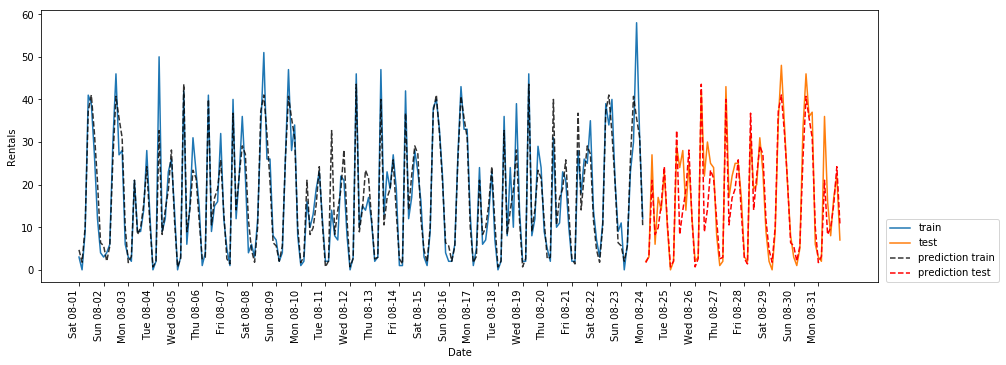

In [632]:
eval_on_features(X_hour_week,y,regressor)

# Conclusion: Model is learning the mean value of rental for WEEK and HOUR of the week. We can use the regular model i.e. Linear Regression and not Random Forrest

Test Score R^2: 0.13


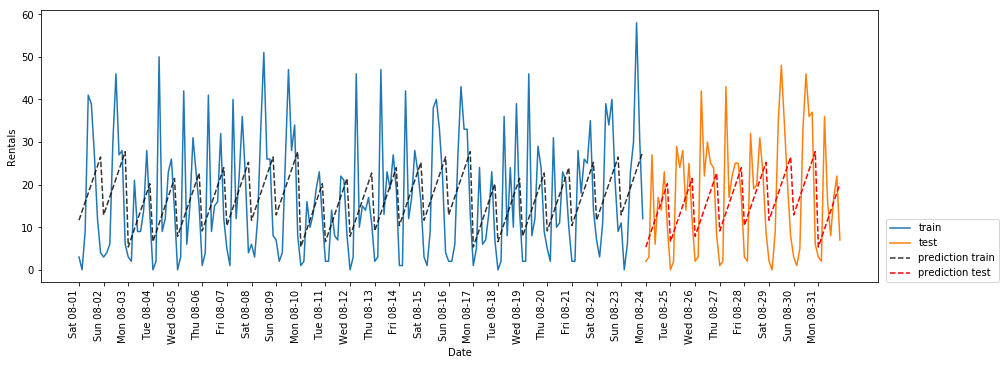

In [636]:
eval_on_features(X_hour_week,y,LinearRegression())

# We can convert the integer WEEK and HOUR of the day to the categorical variables since the model is quite complex to understand following INTEGER CATEGORIES

In [641]:
enc=OneHotEncoder()

In [656]:
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test Score R^2: 0.62


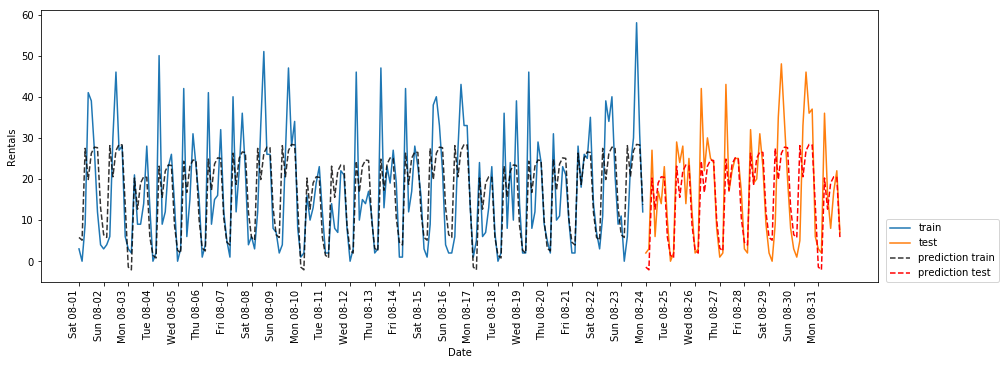

In [668]:
eval_on_features(X_hour_week_onehot,y,Ridge())

# <span style='color:green'> Conclusion: With the integer categorization technique we have got coefficients for week of the day and also for hour of the day. Meaning Linear model learns each coefficient for each day of the week and one coefficient for each time of the day . This means time of the day pattern is shared over all days in the week.</span>

# <span style='color:red'>Improve Linear model Further by adding INTERACTION . Adding and learning coefficient for each combination of day of the week and hour </span>

In [685]:
poly_transformer=PolynomialFeatures(degree =2,interaction_only=True,include_bias=False)

In [686]:
X_hour_week_onehot_poly =poly_transformer.fit_transform(X_hour_week_onehot)

Test Score R^2: 0.85


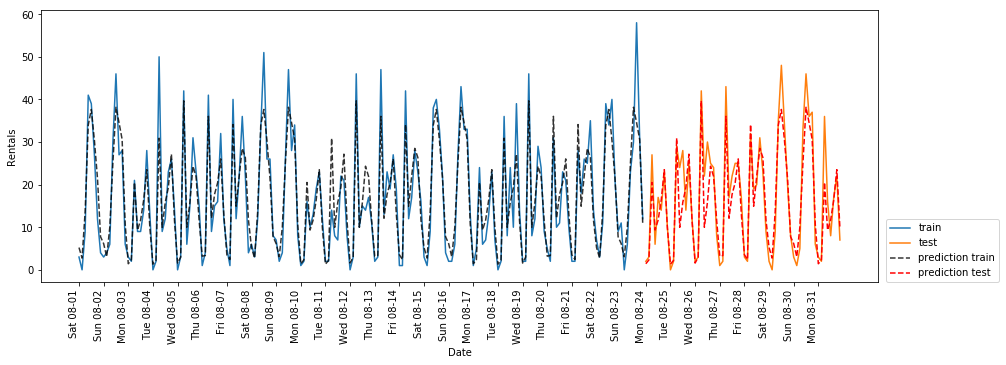

In [687]:
eval_on_features(X_hour_week_onehot_poly,y,Ridge())

# Data Visualization : Non Zero Coefficients of FEATURES learned by Algorithm

In [722]:
lr = Ridge()

In [723]:
lr.fit(X_hour_week_onehot_poly,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [715]:
hours=['%02d:00' %i for i in range(0,24,3)]
day=['mon','tue','wed','thu','fri','sat','sun']
features=day+hours


In [721]:
features_poly=poly_transformer.get_feature_names(features)

In [760]:
feature_nonzero=np.array(features_poly)[lr.coef_!=0]
coef_nonzero= lr.coef_[lr.coef_!=0]

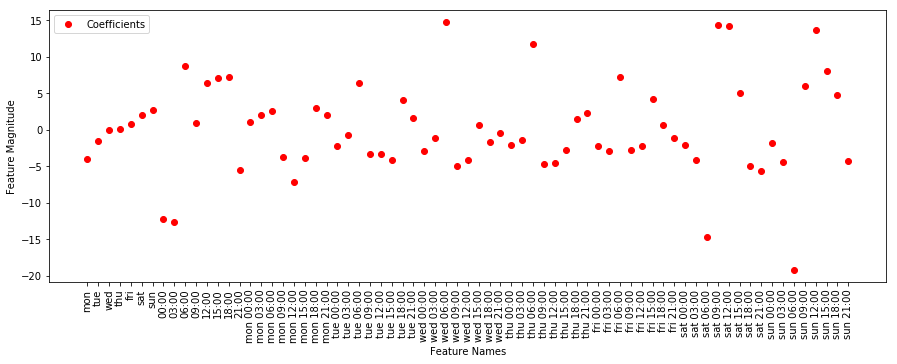

In [769]:
plt.figure(figsize=(15,5))
plt.plot(coef_nonzero,'o',c='r',label='Coefficients')
plt.xticks(range(len(feature_nonzero)),feature_nonzero,rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Magnitude')
_=plt.legend(loc='best')
